## Apply Maslov's Identities

Maslov's paper provides us with a formula for simplifying sequences of gates of the following form:
$$
--- R_{x}(a) --- R_{y}(b) --- R_{x}(a) ---.
$$
Such a sequence of gates can be replaced with the following (single) gate: $--- R(c,d) ---$ where
$$
c = 2 \arccos \left ( \cos(a) \cos(b/2) \right ) \quad \text{and} \quad
d = \left \{
\begin{array}{ll}
\arcsin \left ( \sin(b/2) / \sqrt{1 - \cos^{2}(a) \cos^{2}(b/2)} \right ) & \text{if } a > 0\\
\pi - \arcsin \left ( \sin(b/2) / \sqrt{1 - \cos^{2}(a) \cos^{2}(b/2)} \right ) & \text{if } a < 0
\end{array}
\right .
$$
and the gate $R(\cdot, \cdot)$ has the following matrix description:
$$
R(\theta, \phi) = \left (
\begin{matrix}
\cos(\theta/2) & -i e^{-i\phi} \sin(\theta/2)\\
-i e^{i \phi} \sin(\theta/2) & \cos(\theta/2)
\end{matrix}
\right ).
$$

### The $U$ Gate in Qiskit

In order to code the $R(\theta,\phi)$ gate into a Qiskit circuit we use the $U$-gate from Qiskit:
$$
U(\theta, \phi, \lambda) = \left ( \begin{matrix}
\cos(\theta/2) & -e^{i\lambda} \sin(\theta/2)\\
e^{i\phi} \sin(\theta/2) & e^{i(\lambda + \phi)} \cos(\theta/2)
\end{matrix} \right ).
$$
We note that 
$$
U \left ( \theta, \phi - \frac{\pi}{2}, \frac{\pi}{2} - \phi \right ) = R(\theta, \phi).
$$

### Locations in our circuit

There are five locations in our circuit where we plan to use Maslov's identities:
* $G_{0,4} G_{0,5} G_{0,6}$ in which $a = -\pi$ and $b = -\pi/2$
* $G_{1,3} G_{1,4} G_{1,5}$ in which $a = b = -\pi/2$
* $G_{1,9} G_{1,10} G_{1,11}$ in which $a = -\pi/2$ and $b = \pi/2$
* $G_{2,2} G_{2,3} G_{2,4}$ in which $a = -\pi/2$ and $b = 2\theta_{2} + \pi/2$
* $G_{2,8} G_{2,9} G_{2,10}$ in which $a = -\pi/2$ and $b = \pi/2$

We thus encounter the following four cases:

**Case 1.** $a = -\pi$ and $b = -\pi/2$.

In this case we have 
\begin{aligned}
c &= 2 \arccos \left ( \cos(-\pi) \cos(-\pi/4) \right )\\
&= 2 \arccos(-1/\sqrt{2})\\
&= \frac{3\pi}{2}
\end{aligned}
and
\begin{aligned}
d &= \pi - \arcsin \left ( \frac{\sin(-\pi/4)}{\sqrt{1 - \cos^{2}(-\pi) \cos^{2}(-\pi/4)}} \right )\\
&= \pi - \arcsin \left ( \frac{-1/\sqrt{2}}{1/\sqrt{2}} \right )\\
&= \pi - \arcsin(-1)\\
&= \pi - (-\pi/2)\\
&= \frac{3 \pi}{2}
\end{aligned}
We conclude that
$$
--- R_{x}(-\pi) --- R_{y}(-\pi/2) --- R_{x}(-\pi) --- \equiv --- R(3\pi/2, 3\pi/2) ---,
$$
where $R(3\pi/2, 3\pi/2)$ has the matrix representation
$$
R(3\pi/2, 3\pi/2) = \left (
\begin{matrix}
\cos(3\pi/4) & -i e^{-i 3\pi/2} \sin(3\pi/4)\\
-i e^{i 3\pi/2} \sin(3\pi/4) & \cos(3 \pi/4) 
\end{matrix}
\right )
=
\frac{1}{\sqrt{2}} \left ( \begin{matrix}
-1 & 1\\
-1 & -1
\end{matrix}
\right )
$$
This gate is implemented in Qiskit by the $U$-gate: $R \left ( \frac{3\pi}{2}, \frac{3\pi}{2} \right ) = U \left ( \frac{3\pi}{2}, \pi, -\pi \right )$


**Case 2.** $a = b = -\pi/2$

In this case we have 
$$
c = 2 \arccos( \cos(-\pi/2) \cos(-\pi/4)) = 2 \arccos(0) = \pi
$$
and
$$
d = \pi - \arcsin(\sin (-\pi/4)) = \frac{5\pi}{4}.
$$
Note that $R \left ( \pi, \frac{5\pi}{4} \right ) = U \left (\pi, \frac{3\pi}{4}, -\frac{3\pi}{4} \right )$.

**Case 3.** $a = -\pi/2$ and $b = \pi/2$

In this case we have
$$
c = 2 \arccos(0) = \pi \quad \text{(as we saw in Case 2 above)}
$$
and
$$
d = \pi - \arcsin(\sin(\pi/4)) = \frac{3\pi}{4}.
$$
Note that $R\left ( \pi, \frac{3\pi}{4} \right ) = U \left ( \pi, \frac{\pi}{4}, -\frac{\pi}{4} \right )$.

**Case 4.** $a = -\pi/2$ and $b = 2\theta_{2} + \pi/2$

In this case we again see that $c = \pi$ while
$$
d = \pi - \arcsin \left ( \sin \left ( \theta_{2} + \frac{\pi}{4} \right ) \right ) = \pi - \left ( \theta_{2} + \frac{\pi}{4} \right ) = \frac{3\pi}{4} - \theta_{2}.
$$
This calculation of $d$ holds provided $\theta_{2} \in \left [-\frac{3\pi}{4}, \frac{\pi}{4} \right ]$. We find that $R \left ( \pi, \frac{3\pi}{4} - \theta_{2} \right ) =
U \left ( \pi, \frac{\pi}{4} - \theta_{2}, \theta_{2} - \frac{\pi}{4} \right ).$





In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex
import qiskit.quantum_info as qi

from qiskit_ionq import IonQProvider
# import gates
from qiskit_ionq import GPIGate, GPI2Gate, MSGate
from qiskit import Aer, execute, assemble

# numpy for linear algebra stuff
from numpy.random import randint, shuffle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
def equatorial_prep(qc, phi):
    qc.h(0)
    qc.rz(phi, 0)
    return qc

In [3]:
def equatorial_measurement_prep(qc, phi):
    qc.rz(-phi,0)
    qc.h(0)
    
    qc.rz(-phi,1)
    qc.h(1)
    
    qc.rz(-phi,2)
    qc.h(2)
    
    return qc

In [4]:
def fidelities(out000, out001, out010, out011, out100, out101, out110, out111, bitval, shots):
    
    if bitval == 1:
        B = (out001 + out011 + out101 + out111)/shots
        E = (out010 + out011 + out110 + out111)/shots
        A = (out100 + out101 + out110 + out111)/shots
        
    if bitval == 0:
        B = (out010 + out000 + out110 + out100)/shots
        E = (out001 + out000 + out101 + out100)/shots
        A = (out000 + out001 + out010 + out011)/shots
        
    return B,E,A 


In [5]:
def rxx_cloning(qc, theta2):
    
    qc.ry(np.pi, 1) #G(1,1)
    qc.rxx(np.pi/2, 1, 2) #G(1,2), G(2,1)
    #qc.rx(-np.pi/2, 1) #G(1,3)
    #qc.rx(-np.pi/2, 2) #G(2,2)
    #qc.ry(-np.pi/2, 1) #G(1,4)
    
    #qc.barrier()
    
    
    #qc.rx(-np.pi/2, 1) #G(1,5)
    qc.u(np.pi, 3*np.pi/4, -3*np.pi/4, 1)
    #qc.ry(2*theta2 + np.pi/2, 2) #G(2,3)
    #qc.rx(-np.pi/2, 2) #G(2,4)
    qc.u(np.pi, np.pi/4 - theta2, theta2 - np.pi/4, 2)
    qc.rxx(np.pi/2, 2, 1) #G(1,6), G(2,5)
    qc.ry(-np.pi/2, 2) #G(2,6)
    
    #qc.barrier()
    
    qc.ry(2*theta2, 1) # theta2 =theta3 G(1,7)
    
    #qc.barrier()
    
    qc.ry(np.pi/2, 0) #G(0,1)
    qc.rxx(np.pi/2, 0, 1) #G(0,2), G(1,8)
    #qc.rx(-np.pi/2, 1)  #G(1,9)
    
    #qc.barrier()
    
    qc.rxx(np.pi/2, 0, 2) #G(0,3), G(2,7)
    #qc.rx(-np.pi, 0) #G(0,4)
    qc.u(3*np.pi/2, np.pi, -np.pi, 0)
    #qc.rx(-np.pi/2, 2) #G(2,8)
    #qc.ry(-np.pi/2, 0) #G(0,5)
    
    #qc.barrier()
    
    #qc.rx(-np.pi, 0)  #G(0,6)
    #qc.ry(np.pi/2, 1) #G(1,10)
    #qc.rx(-np.pi/2, 1)  #G(1,11)
    qc.u(np.pi, np.pi/4, -np.pi/4, 1)
    qc.rxx(np.pi/2, 1,0)  #G(0,7), G(1,12)
    qc.ry(-np.pi/2, 1) #G(1,13)
    
    #qc.barrier()
    
    
    #qc.ry(np.pi/2, 2) #G(2,9)
    #qc.rx(-np.pi/2, 2)  #G(2,10)
    qc.u(np.pi, np.pi/4, -np.pi/4, 2)
    qc.rxx(np.pi/2, 2, 0) #G(2,11)
    qc.ry(-np.pi/2, 2) #G(2,12)
    
    return qc

In [6]:
def equatorial_cloner(theta2, phi):
    qc = QuantumCircuit(3,3)
    
    qc = equatorial_prep(qc, phi)
    qc.barrier()
    
    qc = rxx_cloning(qc, theta2)
    qc.barrier()
    
    qc = equatorial_measurement_prep(qc, phi)
    qc.barrier()
    
    qc.measure(0,0)
    qc.measure(1,1)
    qc.measure(2,2)
    
    return qc

In [12]:
def phase_covariance(theta2, phi, shots):
        
    qc = equatorial_cloner(theta2, phi)
    
    shots = 1024 # number of samples used for statistics
    sim = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend = sim, shots = shots)
    
    out000 = job.result().get_counts().get("000")
    out001 = job.result().get_counts().get("001")
    out010 = job.result().get_counts().get("010")
    out011 = job.result().get_counts().get("011")
    out100 = job.result().get_counts().get("100")
    out101 = job.result().get_counts().get("101")
    out110 = job.result().get_counts().get("110")
    out111 = job.result().get_counts().get("111")

    if out000 == None:
        out000 = 0
    if out001 == None:
        out001 = 0
    if out010 == None:
        out010 = 0
    if out011 == None:
        out011 = 0
        
    if out100 == None:
        out100 = 0
    if out101 == None:
        out101 = 0
    if out110 == None:
        out110 = 0
    if out111 == None:
        out111 = 0
        
    B,E,A = fidelities(out000, out001, out010, out011, out100, out101, out110, out111, 0, shots)
    
    #return B,E,A, qc
    return B,E,A

In [10]:
b,e,a, qc = phase_covariance(np.pi/8, 0, 1024)
qc.draw()

┌───┐┌───────┐ ░ ┌─────────┐                                             »
q_0: ┤ H ├┤ Rz(0) ├─░─┤ Ry(π/2) ├─────────────────────────────────────────────»
     └───┘└───────┘ ░ └┬───────┬┘┌───────────┐┌─────────────────┐┌───────────┐»
q_1: ───────────────░──┤ Ry(π) ├─┤0          ├┤ U(π,3π/4,-3π/4) ├┤1          ├»
                    ░  └───────┘ │  Rxx(π/2) │└┬───────────────┬┘│  Rxx(π/2) │»
q_2: ───────────────░────────────┤1          ├─┤ U(π,π/8,-π/8) ├─┤0          ├»
                    ░            └───────────┘ └───────────────┘ └───────────┘»
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                 ┌───────────┐┌───────────┐ ┌──────────────┐┌───────────┐»
«q_0: ────────────┤0          ├┤0          ├─┤ U(3π/2,π,-π) ├┤1          ├»
«     ┌─────────┐ │  Rxx(π/2) ││           │┌┴──────────────┤│  Rxx(π/2) │»
«q_1: ┤ Ry(π/4) ├─┤1          ├┤  Rxx(π/2) ├┤ U(π,π/4,-π/4) ├┤0          ├»
«     ├─────────┴┐└───────────┘│           │├───────────────┤└───────────┘»
«q_2: ┤ Ry(-π/2) ├─────────────┤1          ├┤ U(π,π/4,-π/4) ├─────────────»
«     └──────────┘             └───────────┘└───────────────┘             »
«c: 3/════════════════════════════════════════════════════════════════════»
«                                                                         »
«                 ┌───────────┐             ░ ┌───────┐┌───┐ ░ ┌─┐      
«q_0: ────────────┤1          ├─────────────░─┤ Rz(0) ├┤ H ├─░─┤M├──────
«     ┌──────────┐│           │             ░ ├───────┤├───┤ ░ └╥┘┌─┐   
«q_1: ┤ Ry(-π/2) ├┤  Rxx(π/2) ├─────────────░─┤ Rz(0) ├┤ H ├─░──╫─┤M├───
«     └──────────┘│           │┌──────────┐ ░ ├───────┤├───┤ ░  ║ └╥┘┌─┐
«q_2: ────────────┤0          ├┤ Ry(-π/2) ├─░─┤ Rz(0) ├┤ H ├─░──╫──╫─┤M├
«                 └───────────┘└──────────┘ ░ └───────┘└───┘ ░  ║  ║ └╥┘
«c: 3/══════════════════════════════════════════════════════════╩══╩══╩═
«                                                               0  1  2

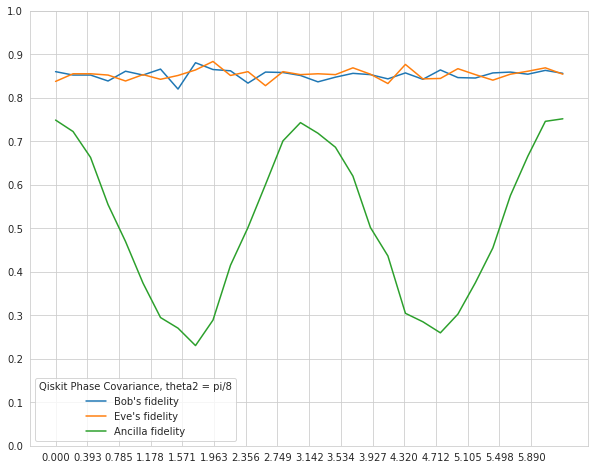

In [13]:
Phi = np.linspace(0, 2*np.pi, 30)

B = []
E = []
A = []

for k in range(len(Phi)):
    b, e, a = phase_covariance(np.pi/8, Phi[k], 1024)
    B.append(b)
    E.append(e)
    A.append(a)
    
B = np.array(B)
E = np.array(E)
A = np.array(A)

plt.figure(figsize=(10,8))
plt.plot(Phi, B, label = "Bob's fidelity")
plt.plot(Phi, E, label = "Eve's fidelity")
plt.plot(Phi, A, label = "Ancilla fidelity")
plt.yticks(np.arange(0,1.1, step = .1))
plt.xticks(np.arange(0, 2*np.pi, step = np.pi/8))
plt.legend(title="Qiskit Phase Covariance, theta2 = pi/8")
plt.show()